## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = 'C:/Users/User/application_train.csv'
dir_data_T = 'C:/Users/User/application_test.csv'
f_app_train = os.path.join(dir_data)
f_app_test = os.path.join(dir_data_T)

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


#等寬

In [11]:
app_train['AMT_GOODS_PRICE_width']=pd.cut(app_train['AMT_GOODS_PRICE'],20)

In [12]:
app_train['AMT_GOODS_PRICE_width'].value_counts()

(36490.5, 240975.0]       79882
(441450.0, 641925.0]      68200
(240975.0, 441450.0]      51830
(641925.0, 842400.0]      47061
(842400.0, 1042875.0]     27682
(1042875.0, 1243350.0]    15976
(1243350.0, 1443825.0]     9380
(1443825.0, 1644300.0]     3049
(1644300.0, 1844775.0]     2815
(2245725.0, 2446200.0]      794
(1844775.0, 2045250.0]      360
(2045250.0, 2245725.0]      139
(2646675.0, 2847150.0]       18
(2446200.0, 2646675.0]       12
(3047625.0, 3248100.0]       12
(3849525.0, 4050000.0]        8
(2847150.0, 3047625.0]        5
(3248100.0, 3448575.0]        4
(3448575.0, 3649050.0]        4
(3649050.0, 3849525.0]        2
Name: AMT_GOODS_PRICE_width, dtype: int64

#等頻

In [23]:
app_train['AMT_GOODS_PRICE_grp']=pd.qcut(app_train['AMT_GOODS_PRICE'],12)

In [24]:
app_train['AMT_GOODS_PRICE_grp'].value_counts()

(495000.0, 675000.0]      44489
(157500.0, 225000.0]      43789
(679500.0, 900000.0]      33654
(405000.0, 450000.0]      29151
(40499.999, 157500.0]     27665
(292500.0, 405000.0]      24949
(450000.0, 495000.0]      24403
(238500.0, 292500.0]      24002
(1125000.0, 4050000.0]    20986
(900000.0, 1125000.0]     20894
(225000.0, 238500.0]       8423
(675000.0, 679500.0]       4828
Name: AMT_GOODS_PRICE_grp, dtype: int64

#自訂

In [60]:
app_train['AMT_GOODS_PRICE_binn']=pd.cut(app_train['AMT_GOODS_PRICE'],[1000,100000,300000,500000,1000000])

In [61]:
app_train['AMT_GOODS_PRICE_binn'].value_counts()

(100000, 300000]     95717
(500000, 1000000]    90496
(300000, 500000]     78192
(1000, 100000]        8709
Name: AMT_GOODS_PRICE_binn, dtype: int64

In [55]:
price = app_train[['TARGET', 'AMT_GOODS_PRICE']].copy()
price["price_BINNED"] = app_train['AMT_GOODS_PRICE_binn']
price = price.sort_values(by='price_BINNED')
price_grouped  = price.groupby('price_BINNED').mean()
price_grouped

,TARGET,AMT_GOODS_PRICE
price_BINNED,,
"(1000, 100000]",0.060397,75921.970892
"(100000, 300000]",0.081668,211344.457599
"(300000, 500000]",0.104000,423968.619878
"(500000, 1000000]",0.073042,733329.899294


In [62]:

app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,AMT_GOODS_PRICE_width,AMT_GOODS_PRICE_grp,AMT_GOODS_PRICE_binn
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,1,0,1,0,False,"(240975.0, 441450.0]","(292500.0, 405000.0]","(300000, 500000]"
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,1,0,False,"(1042875.0, 1243350.0]","(1125000.0, 4050000.0]",NaN
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,False,"(36490.5, 240975.0]","(40499.999, 157500.0]","(100000, 300000]"
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,False,"(240975.0, 441450.0]","(292500.0, 405000.0]","(100000, 300000]"
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,False,"(441450.0, 641925.0]","(495000.0, 675000.0]","(500000, 1000000]"


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


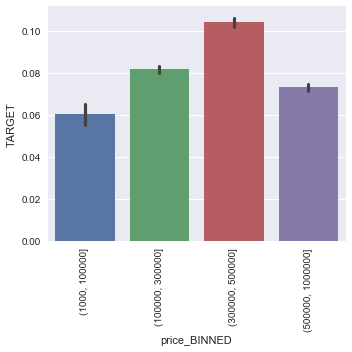

In [64]:
g = sns.catplot(x='price_BINNED', y='TARGET', data=price, kind='bar')
g.set_xticklabels(rotation=90)
plt.tight_layout()

#AMT_INCOME_TOTAL 數據處理

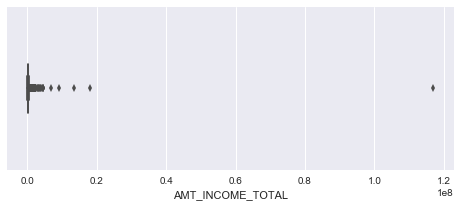

In [27]:
import seaborn as sns
plt.style.use('seaborn')

plt.figure(figsize=(8, 3))
sns.boxplot(app_train['AMT_INCOME_TOTAL'], width=0.3)

In [28]:
income = app_train[['TARGET', 'AMT_INCOME_TOTAL']].copy()
income["INCOME_BINNED"] = pd.qcut(income["AMT_INCOME_TOTAL"], q=10)
income = income.sort_values(by='INCOME_BINNED')
income_grouped  = income.groupby('INCOME_BINNED').mean()
income_grouped

,TARGET,AMT_INCOME_TOTAL
INCOME_BINNED,,
"(25649.999, 81000.0]",0.081908,66254.124685
"(81000.0, 99000.0]",0.082232,91089.278813
"(99000.0, 112500.0]",0.087192,111333.276330
"(112500.0, 135000.0]",0.084894,131852.488657
"(135000.0, 147150.0]",0.090007,142953.056026
"(147150.0, 162000.0]",0.086407,157141.512098
"(162000.0, 180000.0]",0.084224,178061.632269
"(180000.0, 225000.0]",0.078065,212733.495347
"(225000.0, 270000.0]",0.070401,259491.085277


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


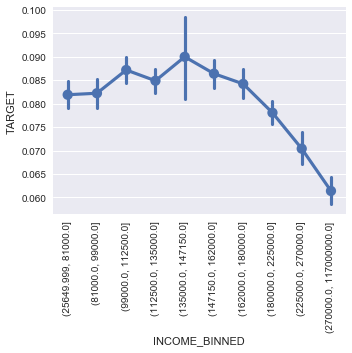

In [33]:
g = sns.catplot(x='INCOME_BINNED', y='TARGET', data=income, kind='point')
g.set_xticklabels(rotation=90)
plt.tight_layout()